In [1]:
# Import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import branca.colormap as cm
import seaborn as sns
import branca.colormap as cm  
import folium
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s3e20/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e20/test.csv')
train.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [4]:
train.describe()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,79023.000000,79023.000000,79023.000000,79023.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,...,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,79023.000000
mean,-1.891072,29.880155,2020.000000,26.000000,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,5592.377478,59420.297456,4670.430869,19.139241,0.271460,-10.784832,40.436976,-86.800583,27.925981,81.940552
std,0.694522,0.810375,0.816502,15.297155,0.000272,0.185382,0.000206,0.071364,64.263368,14.149950,...,1428.503002,9051.163609,1359.251583,13.547047,0.049434,30.374462,6.428216,37.837269,4.403835,144.299648
min,-3.299000,28.228000,2019.000000,0.000000,-0.000996,0.241822,-0.000887,0.000000,-179.537059,0.099237,...,1050.661782,24779.033704,1050.496816,1.844529,0.017697,-102.739731,2.998873,-153.464211,10.818288,0.000000
25%,-2.451000,29.262000,2019.000000,13.000000,-0.000096,0.705817,-0.000078,0.110535,-56.782383,28.844520,...,4595.400519,53175.779928,3680.856344,9.974574,0.241453,-30.309170,35.829907,-125.991158,24.686763,9.797995
50%,-1.882000,29.883000,2020.000000,26.000000,0.000024,0.809118,0.000019,0.161855,-12.441726,37.784299,...,5573.854309,59332.532548,4621.755170,15.130688,0.272747,-12.673914,41.119630,-84.644352,28.333630,45.593445
75%,-1.303000,30.471000,2021.000000,39.000000,0.000153,0.942792,0.000121,0.211824,72.059990,47.634875,...,6542.303642,65663.842684,5572.983223,23.785030,0.302892,9.402202,44.446272,-48.132701,31.499883,109.549595
max,-0.510000,31.532000,2021.000000,52.000000,0.004191,1.885239,0.004236,0.299998,122.095200,66.242012,...,12384.239458,89291.615576,11384.239458,250.000000,0.736514,78.223037,65.951248,-22.653170,42.060436,3167.768000


## Exploratory Data Analysis

In [5]:
#Identify missing values
missing = train.isnull().sum()
missing[missing > 0].sort_values(ascending=False).head(40)

UvAerosolLayerHeight_aerosol_pressure                       78584
UvAerosolLayerHeight_solar_zenith_angle                     78584
UvAerosolLayerHeight_aerosol_height                         78584
UvAerosolLayerHeight_aerosol_optical_depth                  78584
UvAerosolLayerHeight_sensor_zenith_angle                    78584
UvAerosolLayerHeight_sensor_azimuth_angle                   78584
UvAerosolLayerHeight_solar_azimuth_angle                    78584
NitrogenDioxide_NO2_slant_column_number_density             18320
NitrogenDioxide_tropopause_pressure                         18320
NitrogenDioxide_tropospheric_NO2_column_number_density      18320
NitrogenDioxide_absorbing_aerosol_index                     18320
NitrogenDioxide_cloud_fraction                              18320
NitrogenDioxide_sensor_altitude                             18320
NitrogenDioxide_sensor_azimuth_angle                        18320
NitrogenDioxide_sensor_zenith_angle                         18320
NitrogenDi

In [6]:
#Identify features with more than 85% missing values
features = [features for features in train.columns if train[features].isnull().sum()>70000]
features

['UvAerosolLayerHeight_aerosol_height',
 'UvAerosolLayerHeight_aerosol_pressure',
 'UvAerosolLayerHeight_aerosol_optical_depth',
 'UvAerosolLayerHeight_sensor_zenith_angle',
 'UvAerosolLayerHeight_sensor_azimuth_angle',
 'UvAerosolLayerHeight_solar_azimuth_angle',
 'UvAerosolLayerHeight_solar_zenith_angle']

 **UvAerosolLayerHeight feature has more than 85% missing values and these features can be dropped from the dataset**

In [7]:
#Get the unique list of latitude and longitudes
unique_lat_long = []
for i in zip(train.latitude,train.longitude):
    if list(i) not in unique_lat_long:
        unique_lat_long.append(list(i))
               
len(unique_lat_long)

497

**There are totally 497 unique locations**

In [8]:
# Group the train by 'latitude' and 'longitude' and compute the sum of the 'emission' values for each location
group = train.groupby(['latitude', 'longitude'])['emission'].sum().reset_index()

# Create a linear colormap that maps emission values to colors
colormap = cm.LinearColormap(['green', 'red'], vmin=0, vmax=75000) # emssions above 75k will be labeled black

# Create a map centered at the mean latitude and longitude of points
map = folium.Map(location=[group['latitude'].mean(), group['longitude'].mean()])

# Add a circle marker to the map for each point in grouped dataframe
for _, row in group.iterrows():
    rows_emission = row['emission']
    color = 'blue' if rows_emission == 0 else colormap(rows_emission) if rows_emission < 10**5 else 'black'
    folium.Circle(
        location=[row['latitude'], row['longitude']],
        radius=np.sqrt(row['emission'])*15,
        color=color,
        fill=True,
        fill_color= color
    ).add_to(map)

# Fit the map to the bounds of markers
map.fit_bounds(map.get_bounds())

# Display the map
map

In [9]:
#Calculate the average emission rate for each year
average_emission = train.groupby(['year']).agg('mean').reset_index()[['year','emission']]
average_emission

/tmp/ipykernel_1412/123723094.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_emission = train.groupby(['year']).agg('mean').reset_index()[['year','emission']]


,year,emission
0,2019,87.255317
1,2020,75.992122
2,2021,82.574217


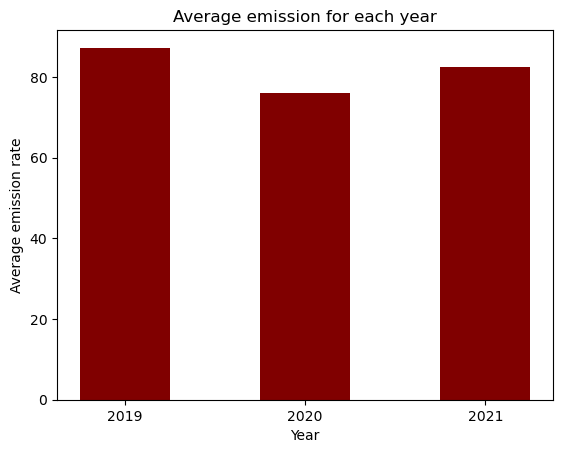

In [10]:
#Plot average emission for each year
plt.bar(average_emission['year'].astype(str),average_emission['emission'],color = 'maroon',width =0.5)
plt.xlabel("Year")
plt.ylabel("Average emission rate")
plt.title("Average emission for each year")
plt.show()

**Average emission is more in year 2019**

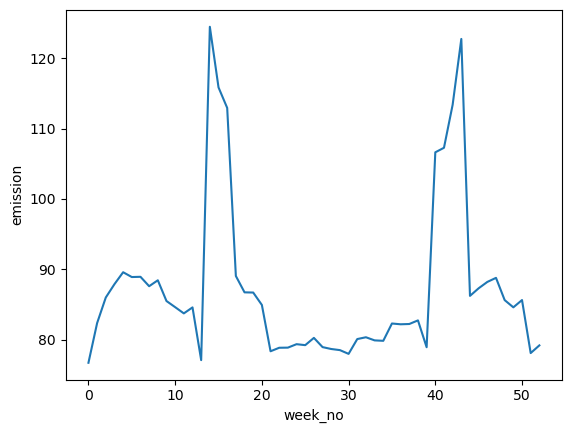

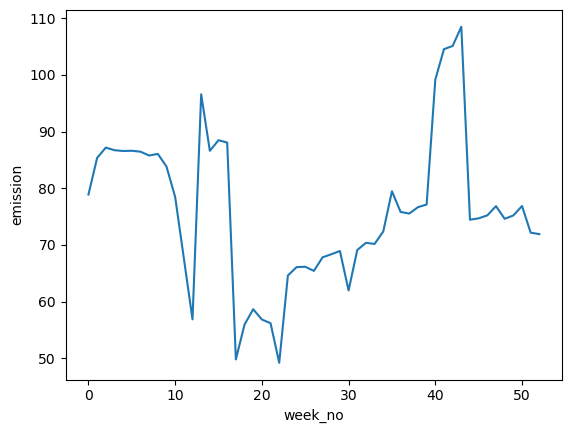

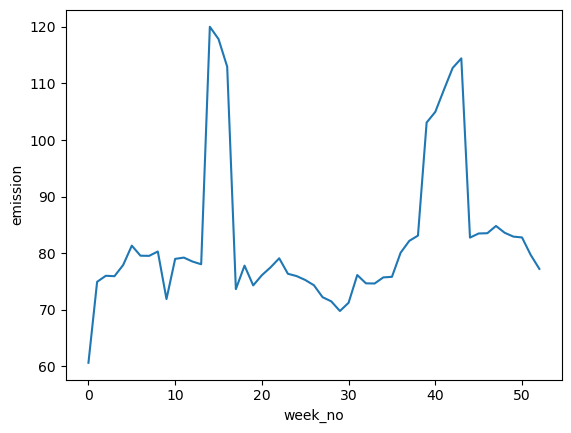

In [11]:
# Observe the weekly emission for each year
data_2019 = train[train['year']==2019][['year','week_no','emission']]
data_2020 = train[train['year']==2020][['year','week_no','emission']]
data_2021 = train[train['year']==2021][['year','week_no','emission']]

sns.lineplot(data = data_2019, x = 'week_no', y = 'emission', errorbar = None)
plt.show()
sns.lineplot(data = data_2020, x = 'week_no', y = 'emission', errorbar = None)
plt.show()
sns.lineplot(data = data_2021, x = 'week_no', y = 'emission', errorbar = None)
plt.show()

**For all the 3 years, emission looks higher in the week between 12 and 16 and between 40 and 43**

## Feature Engineering 

In [12]:
# Since we already have individual columns dervied from 'ID_LAT_LON_YEAR_WEEK' in train data. We can drop this column
train.drop("ID_LAT_LON_YEAR_WEEK", inplace = True,axis = 1)

In [13]:
#Drop features with more than 85% missing values
train.drop(features,inplace=True,axis=1)

In [14]:
train.isnull().sum()

latitude                                        0
longitude                                       0
year                                            0
week_no                                         0
SulphurDioxide_SO2_column_number_density    14609
                                            ...  
Cloud_sensor_azimuth_angle                    484
Cloud_sensor_zenith_angle                     484
Cloud_solar_azimuth_angle                     484
Cloud_solar_zenith_angle                      484
emission                                        0
Length: 68, dtype: int64

In [15]:
#Replace the missing values with mean
for feature in train.columns:
    if train[feature].isnull().sum()>0:
        train[feature].fillna(np.mean(train[feature]),inplace=True)

In [16]:
## We can remove the constant columns from dataset. 
#We can drop features which has variance close to zero
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold = 0.001)
var_thres.fit(train)
var_thres.get_support()

array([ True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [17]:
constant_columns = [columns for columns in train.columns
                    if columns not in train.columns[var_thres.get_support()]]
constant_columns

['SulphurDioxide_SO2_column_number_density',
 'SulphurDioxide_SO2_slant_column_number_density',
 'SulphurDioxide_SO2_column_number_density_15km',
 'CarbonMonoxide_CO_column_number_density',
 'NitrogenDioxide_NO2_column_number_density',
 'NitrogenDioxide_tropospheric_NO2_column_number_density',
 'NitrogenDioxide_stratospheric_NO2_column_number_density',
 'NitrogenDioxide_NO2_slant_column_number_density',
 'Formaldehyde_tropospheric_HCHO_column_number_density',
 'Formaldehyde_HCHO_slant_column_number_density',
 'Ozone_O3_column_number_density',
 'Ozone_O3_slant_column_number_density']

In [18]:
#Drop the features which has variance close to zero
train.drop(constant_columns,axis=1,inplace= True)

In [19]:
# With the following function we can select highly correlated independent features
# It will remove the first feature that is highly correlated with anything other feature

def correlation(dataset,threshold):
    col_corr = set()  # set of all names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
         for j in range(i):
                if abs(corr_matrix.iloc[i,j]) > threshold: # we are interesed in absolute coeff value
                    colname = corr_matrix.columns[i]  #get the name of the column
                    col_corr.add(colname)
                    
    return col_corr  

In [20]:
corr_features = correlation(train, 0.8)
corr_features

{'CarbonMonoxide_solar_azimuth_angle',
 'Cloud_cloud_base_height',
 'Cloud_cloud_base_pressure',
 'Cloud_cloud_fraction',
 'Cloud_cloud_top_height',
 'Cloud_solar_azimuth_angle',
 'Cloud_solar_zenith_angle',
 'Formaldehyde_solar_azimuth_angle',
 'NitrogenDioxide_solar_azimuth_angle',
 'Ozone_O3_column_number_density_amf',
 'Ozone_sensor_azimuth_angle',
 'Ozone_sensor_zenith_angle',
 'Ozone_solar_azimuth_angle',
 'Ozone_solar_zenith_angle',
 'UvAerosolIndex_solar_azimuth_angle',
 'UvAerosolIndex_solar_zenith_angle'}

In [21]:
#drop the highly correlated independent features 
train = train.drop(corr_features,axis=1)

In [22]:
#Split dependent and independent features
X = train.drop(columns = 'emission')
y = train['emission']

In [23]:
#Apply all the above feature engineering steps to test data as well

# Since we already have individual columns dervied from 'ID_LAT_LON_YEAR_WEEK' in test data. We can drop this column
test.drop("ID_LAT_LON_YEAR_WEEK", inplace = True,axis = 1)

#Identify features with more than 85% missing values
test_features = [features for features in test.columns if test[features].isnull().sum()>22000]
test_features

#Drop features with more than 90% missing values
test.drop(test_features,inplace=True,axis=1)

#Replace the missing values with mean
for feature in test.columns:
    if test[feature].isnull().sum()>0:
        test[feature].fillna(np.mean(test[feature]),inplace=True)
        
#Drop the features which has variance close to zero
test.drop(constant_columns,axis=1,inplace= True)    

#drop the highly correlated independent features 
test = test.drop(corr_features,axis=1)

## Model Building 

In [24]:
#Splitting train data again into train_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2023)

In [25]:
#Apply Randon Forest Regressor model from sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
model = RandomForestRegressor(random_state = 2023, n_jobs=-1)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

# Measuring the accuracy of the model
print(f'RMSE Score: {mean_squared_error(y_test, y_pred, squared=False)}')


RMSE Score: 22.296668263466824


In [26]:
#Predict the output for test data using the previously built model
test_pred = model.predict(test)

#Read sample submission file
sample_submission = pd.read_csv('/kaggle/input/playground-series-s3e20/sample_submission.csv', index_col='ID_LAT_LON_YEAR_WEEK')

#Replace the emission column with newly predicted values
sample_submission.emission = test_pred

#Write the file submission to .csv file
sample_submission.to_csv('submission.csv')